# Аналитика в Яндекс.Афише

## Цели исследования
Целью данного исследования является поиск путей оптимизации маркетинговых затрат Яндекс.Афиши, определение наилучших источников/платформ для привлечения покупателей.  
Исследование проводится на основе данных от Яндекс.Афиши с июня 2017 по конец мая 2018 года.

## План выполнения работы:
 1. Изучение общей информации и подготовка данных к анализу;
 2. Анализ данных (построение отчетов и расчет метрик);
 3. Формулирование выводов и рекомендаций.

## Шаг 1. Изучение общей информации о файлах и подготовка данных к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Изучение общей информации о файлах

In [2]:
# Выгрузим датафреймы из csv файлов
visits_df = pd.read_csv('/datasets/visits_log.csv')
visits_df.name = 'visits_df'
orders_df = pd.read_csv('/datasets/orders_log.csv')
orders_df.name = 'orders_df'
costs_df = pd.read_csv('/datasets/costs.csv')
costs_df.name = 'costs_df'

dfs = [visits_df, orders_df, costs_df]

def display_df_info(df):
    """
    Функция выводит на экран основную информацию по датафрейму, а также его первые 10 строк.
    """
    print('==========')
    print(df.name)
    print('==========')
    display(df.info())
    display(df.describe())
    display(df.head(10))
    
# Изучим общую информацию об имующихся дата-фреймах
for df in dfs:
    display_df_info(df)


visits_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


orders_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


costs_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


### Вывод:

Для анализа доступны следующие данные:  
1. visits_df (лог сервера с информацией о посещениях сайта):  
Uid — уникальный идентификатор пользователя;  
Device — категория устройства пользователя;  
Start Ts — дата и время начала сессии;  
End Ts — дата и время окончания сессии;  
Source Id — идентификатор рекламного источника, из которого пришел пользователь.  
2. orders_df (информация о заказах):  
Uid — уникальный id пользователя, который сделал заказ;  
Buy Ts — дата и время заказа;  
Revenue — выручка Яндекс.Афиши с этого заказа.  
3. costs_df (информация о затратах на маркетинг):  
source_id — идентификатор рекламного источника;  
dt — дата;  
costs — затраты на этот рекламный источник в этот день.  

### Подготовка данных

Изучив общую информации о файлах, видим, что пропуски в данных отсутствуют.  
Вместе с тем, требуются следующие шаги по подготовке данных:   
1. Переименование столбцов (приведение их к нижнему регистру, избавление от пробелов).
2. Приведение данных, содержащих информацию о дате и времени, к типу datetime;
3. Проверка данных на наличие дубликатов.

#### Переименование столбцов

In [4]:
# Приведем названия столбцов к нижнему регистру и заменим пропуски на нижнее подчеркивание
for df in dfs:
    df.columns = df.columns.str.lower().str.replace(' ', '_')


#### Приведение данных к нужным типам

Для удобства работы с датой и временем, приведем стобцы, содержащие информацию о дате и времени, к типу `datetime`

In [5]:
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'])
orders_df['buy_ts'] = pd.to_datetime(orders_df['buy_ts'])
costs_df['dt'] = pd.to_datetime(costs_df['dt'])


#### Проверка данных на то, что в них содержится только требуемый период времени

In [6]:
print('visits_df min: ' + str(visits_df['start_ts'].min()))
print('visits_df max: ' + str(visits_df['start_ts'].max()))
print()
print('orders_df min: ' + str(orders_df['buy_ts'].min()))
print('orders_df max: ' + str(orders_df['buy_ts'].max()))
print()
print('costs_df min: ' + str(costs_df['dt'].min()))
print('costs_df max: ' + str(costs_df['dt'].max()))


visits_df min: 2017-06-01 00:01:00
visits_df max: 2018-05-31 23:59:00

orders_df min: 2017-06-01 00:10:00
orders_df max: 2018-06-01 00:02:00

costs_df min: 2017-06-01 00:00:00
costs_df max: 2018-05-31 00:00:00


Как видим, в visits_df и orders_df присутствуют значения за 1 июня 2018 года.  
Так как исследование проводится на данных от Яндекс.Афиши с июня 2017 по конец мая 2018 года, данные за 1 июня 2018 года попали в датасет по ошибке и их нужно удалить.

In [7]:
# Сделаем выборку только за требуемый период
visits_df = visits_df[visits_df['start_ts'] < pd.Timestamp('2018-06-01 00:00')]
orders_df = orders_df[orders_df['buy_ts'] < pd.Timestamp('2018-06-01 00:00')]


#### Проверка данных на наличие дубликатов

In [8]:
for df in dfs:
    print('Количество дубликатов в ' + df.name + ': ' + str(visits_df.duplicated().sum()))

Количество дубликатов в visits_df: 0
Количество дубликатов в orders_df: 0
Количество дубликатов в costs_df: 0


### Вывод

Первоначальная подготовка данных к анализу проведена. В случае появления необходимости, дополнительная подготовка будет проведена непосредственно во время выполнения анализа данных.

## Шаг 2. Построение отчетов и рассчет метрик

### Сколько людей пользуются продуктом в день, неделю, месяц

#### Чтобы посчитать DAU, WAU и MAU, выделим в отдельные столбцы день, неделю, месяц и год.

In [9]:
visits_df['session_month'] = visits_df['start_ts'].astype('datetime64[M]')
visits_df['session_week'] = visits_df['start_ts'].astype('datetime64[D]') - pd.to_timedelta(visits_df['start_ts'].dt.dayofweek, unit='d')
visits_df['session_date'] = visits_df['start_ts'].astype('datetime64[D]')


#### Рассчитаем значение DAU (daily active users)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


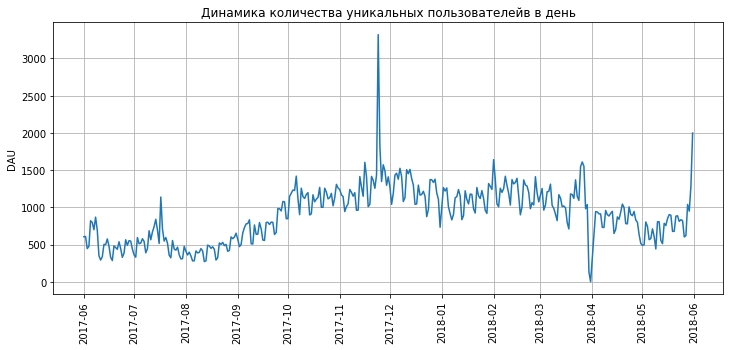

In [10]:
# Рассчитаем значение DAU (daily active users)
dau = visits_df.groupby('session_date').agg(
    n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')
).reset_index()

# Отобразим измененние значение dau в течениии года
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot('session_date', 'n_uid', data=dau)
# Зададим формат для xticks в виде год-месяц
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Динамика количества уникальных пользователейв в день')
plt.ylabel('DAU')

plt.grid()
plt.show()



Как видно из графика, значение dau было подвержено существенным колебаниям в течение исследуемого периода. Пикового значения оно достигло в конце ноября 2017 года, а в конце марта 2018 наблюдалось наименьшее количество уникальных пользователей в день.  
В связи с этим:  
- в качестве среднего значения dau видится целесообразным применять медиану;
- стоит более подробно исследовать временные промежутки, где dau существенно отличался от медианного значения.

In [11]:
# Посчитаем медиану для dau
dau_median = dau['n_uid'].median()
print("Медианное значение dau = " + str(dau_median))

# Так как по графику сложно определить, в какой именно день наблюдалось пиковое значение dau,
# посчитаем в какой день он был максимальным
dau_max = dau['n_uid'].max()
dau_max_date = dau[dau['n_uid'] == dau_max]['session_date']
print("Максимальное значение dau = " + str(dau_max))
print('Дата, в которую dau был максимальным: ' + dau_max_date.to_string(index=False))


Медианное значение dau = 921.0
Максимальное значение dau = 3319
Дата, в которую dau был максимальным: 2017-11-24


In [12]:
print(f"Дата, в которую dau был максимальным: {dau.set_index('session_date').idxmax().dt.strftime('%Y-%m-%d')[0]}")

Дата, в которую dau был максимальным: 2017-11-24


Таким образом, медианное значение dau составляет 923 уникальных пользователя в день.  
Максимальное число уникальных пользователей (3303) было 24 ноября 2017 года, в так называемую "черную пятницу". Вероятно, это связано со скидками, предоставляемыми в этот день.

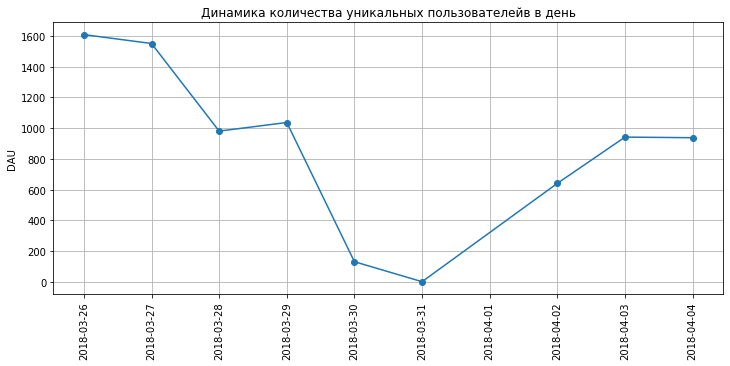

In [13]:
# Рассмотрим более подробно период с наименьшим dau
# Значения dau отобразим точками, чтобы увидеть, присутствуют ли данные за каждый день
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot('session_date', 'n_uid', 'o', linestyle='-', \
        data=dau[(dau['session_date'] > pd.Timestamp('2018-03-25 00:00')) & \
                  (dau['session_date'] < pd.Timestamp('2018-04-05 00:00'))])
# Зададим формат для xticks в виде месяц-день
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation = 90)
plt.title('Динамика количества уникальных пользователейв в день')
plt.ylabel('DAU')
plt.grid()
plt.show()

Как видно из графика, 31 марта количество уникальных пользователей было близко к нолю, а данные за 1 апреля вообще отсутствуют.  
Возможно, данные за данный период не записались из-за технического сбоя или по какой-либо другой причине.

#### Рассчитаем значение WAU (weekly active users)

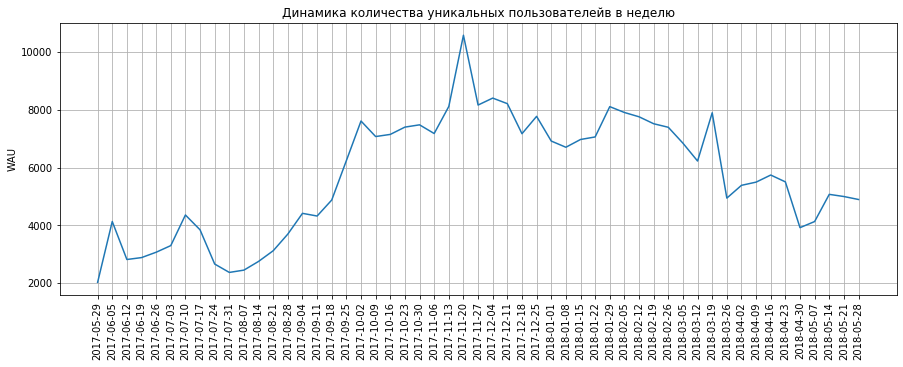

Медианное значение wau = 5740.0


In [14]:
wau = visits_df.groupby('session_week').agg(
    n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')
).reset_index()

# Поскольку неделя, начавшаяся 2018-05-31, содержит всего 1 день, удалим ее из wau
wau = wau[wau['session_week'] < pd.Timestamp('2018-05-31 00:00')]

# Отобразим измененние значение wau в течениии года
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot('session_week', 'n_uid', data=wau)
plt.xticks(rotation = 90)
plt.xticks(wau['session_week'].unique())
plt.title('Динамика количества уникальных пользователейв в неделю')
plt.ylabel('WAU')
plt.grid()
plt.show()

# Посчитаем медиану для wau
wau_median = wau['n_uid'].median()
print("Медианное значение wau = " + str(wau_median))


#### Рассчитаем значение MAU (monthly active users)

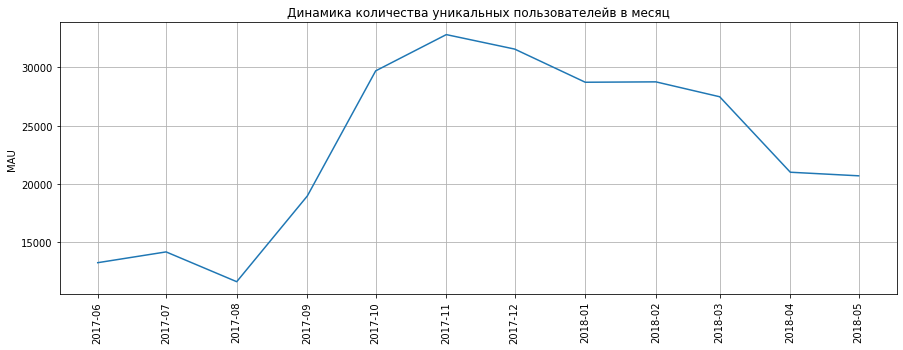

Медианное значение mau = 24240.5


In [15]:
mau = visits_df.groupby('session_month').agg(
    n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')
).reset_index()

# Отобразим измененние значение wau в течениии года
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot('session_month', 'n_uid', data=mau)
# Зададим формат для xticks в виде год-месяц
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.xticks(mau['session_month'].unique())
plt.title('Динамика количества уникальных пользователейв в месяц')
plt.ylabel('MAU')
plt.grid()
plt.show()

# Посчитаем медиану для mau
mau_median = mau['n_uid'].median()
print("Медианное значение mau = " + str(mau_median))


### Вывод

В среднем, число уникальных пользователей Яндекс.Афиши составляло: 923 пользователя в сутки, 5737 - в неделю и 24240 - в месяц (медианные значения).  
Однако, данные значения  существенно менялись на протяжении исследуемого периода.  
Так, минимальное число пользователей  наблюдалось в летние месяцы, когда значение mau не превышало 15000. Возможно, это связано с периодом отпусков.  
Максимальное число пользователей приходилось на период ноября 2017 - марта 2018 (mau более 25000). Пиковое количество уникальных пользователей было 24 ноября 2017 года, в так называемую "черную пятницу". В этот день dau составил 3303 уникальных пользователя за сутки.

### Количество сессий в день

In [16]:
# Рассчитаем количество сессий и количество уникальных пользователей для каждого дня
session_per_user = visits_df.groupby('session_date').agg\
(n_sessions = ('uid', 'count'), \
 n_users = ('uid', 'nunique')).reset_index()

# Рассчитаем среднее количество сессий для каждого уникального пользователя
session_per_user['dayly_sessions_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
dayly_sessions_per_user_mean = session_per_user['dayly_sessions_per_user'].mean()

print("В среднем пользователи совершают {:.2f} сессии в день".format(dayly_sessions_per_user_mean))

В среднем пользователи совершают 1.08 сессии в день


### Вывод

Большинство пользователей заходит на Яндекс.Афишу лишь один раз в день, о чем говорит среднее значение количества сессий, равное 1.08.

### Сколько длится одна сессия

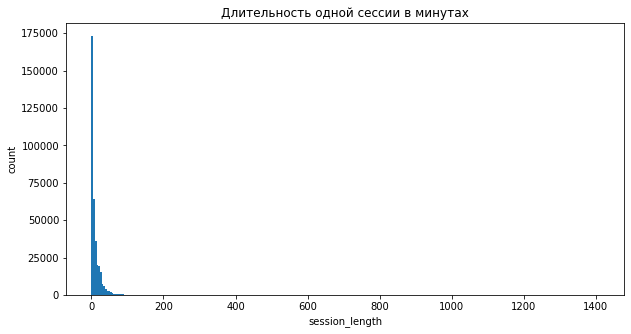

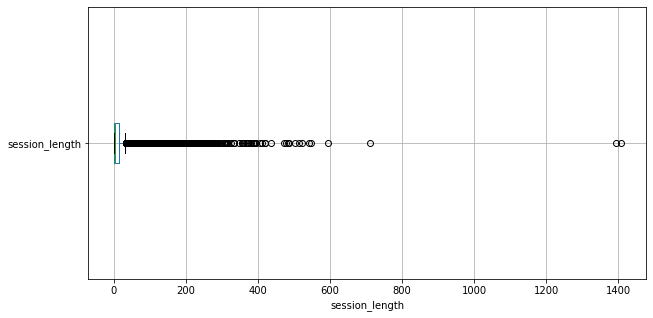

In [17]:
# Добавим в датафрейм visits_df информацию о длительности сессий в минутах 
# (поскольку end_ts и start_ts в исходном датафрейме даны с точностью до минуты)
visits_df['session_length'] = ((visits_df['end_ts'] - visits_df['start_ts']).dt.seconds / 60).astype(int)

#Построим гистограмму и boxplot длительностей сессий
def show_hist_and_boxplot(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df['session_length'], bins=300)
    plt.title('Длительность одной сессии в минутах')
    plt.ylabel('count')
    plt.xlabel('session_length')
    plt.show()
    plt.figure(figsize=(10, 5))
    plt.xlabel('session_length')
    df[['session_length']].boxplot(vert=False)
    plt.show()
    
show_hist_and_boxplot(visits_df)

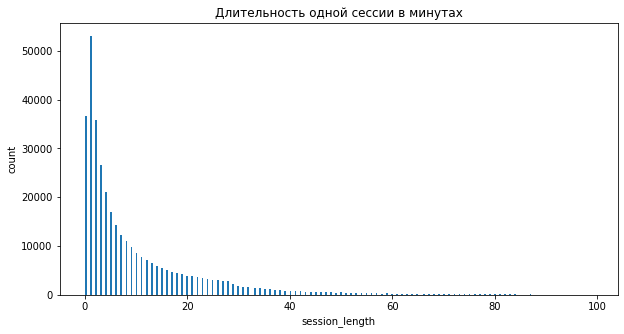

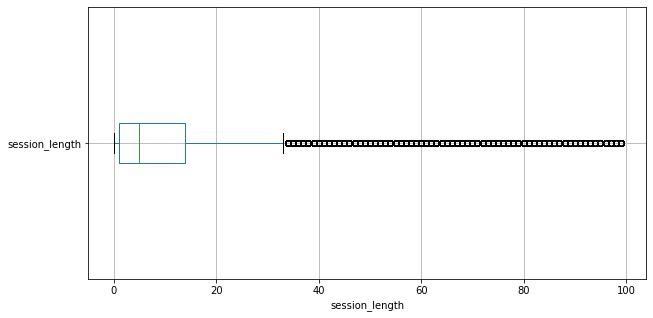

In [18]:
# Построим гистограмму и boxplot для сессий короче 100 минут
show_hist_and_boxplot(visits_df.query('session_length < 100'))

In [19]:
# функция для отображения гистограммы и боксплота
def histbox(values, figsize=(8, 8), title=None, bins=11, xlabel=None, whis=1.5, label='Гистограмма', 
            flierprops=dict(markerfacecolor='r', marker='s'), boxprops=dict(color='white'), whiskerprops=dict(color='#FFC358'), xlim=None, **kwargs):
    # Построение гистограммы
    fig, ax1 = plt.subplots(figsize=figsize)
    plt.title(title)
    ax1.hist(values, bins=bins, label=label, **kwargs)
    ax1.set_xlabel(xlabel)
    ax1.legend()
    ax1.set_xlim(xlim)
    ax1.grid(True)
    ax2 = ax1.twinx()
    
    ax2.boxplot(values, vert=False, whis=whis, notch=True, capprops=whiskerprops, 
                flierprops=flierprops, boxprops=boxprops, whiskerprops=whiskerprops)
    ax2.set_xlim(xlim)
    plt.show()

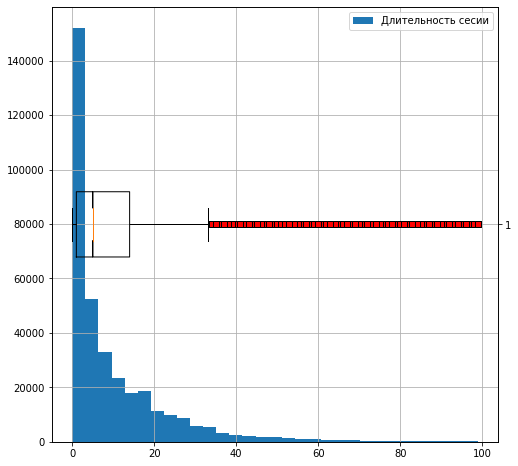

In [20]:
histbox(visits_df.query('session_length < 100')['session_length'], bins=31,
       boxprops=dict(color='black'), whiskerprops=dict(color='black'), label='Длительность сесии')

Как видно из гистограммы и диаграммы размаха, распределение длительности сессии не является нормальным и содержит выбросы. Таким образом, для оценки средней длительности сессии целесообразно использовать медиану. 

In [21]:
session_length_median = visits_df['session_length'].median()
print("В среднем одна сессия длится {:.1f} минут".format(session_length_median))


В среднем одна сессия длится 5.0 минут


### Вывод

Типичная сессия длится от 2х до 14 минут, медианное значение составляет 5 минут. В тоже время, присутствуют "выбросы" с длинной сессии от 100 до 1400 минут (более 23х часов).

### Как часто люди возвращаются (Retention Rate)

In [22]:
# Для каждого пользователя найдем дату и время первого посещения
first_activity_ts = visits_df.groupby(['uid'])['start_ts'].min()
first_activity_ts.name = 'first_activity_ts'

# Добавим информацию о дате и времени первого посещения в visits_df
visits_df = visits_df.join(first_activity_ts,on='uid')

In [23]:
# Добавим в visits_df информацию о месяце первого посещения
visits_df['first_activity_month'] = visits_df['first_activity_ts'].astype('datetime64[M]')

# Посчитаем время жизни кагорты в месяцах
visits_df['cohort_lifetime'] = (visits_df['session_month'] - visits_df['first_activity_month'])
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'] / np.timedelta64(1,'M')
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'].round().astype(int)

In [24]:
# Сгруппируем данные по когорте и lifetime. 
# Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»
visits_cohorts = visits_df.groupby(['first_activity_month','cohort_lifetime'])\
.agg(n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')).reset_index()

# Найдём исходное количество пользователей в когорте и назовем его cohort_users
initial_users_count = visits_cohorts[visits_cohorts['cohort_lifetime'] == 0][['first_activity_month','n_uid']]
initial_users_count = initial_users_count.rename(columns={'n_uid':'cohort_users'})

# Объединим данные по когортам с исходным количеством пользователей в когорте
visits_cohorts = visits_cohorts.merge(initial_users_count,on='first_activity_month')

# Рассчитаем Retention Rate
visits_cohorts['retention'] = visits_cohorts['n_uid']/visits_cohorts['cohort_users']

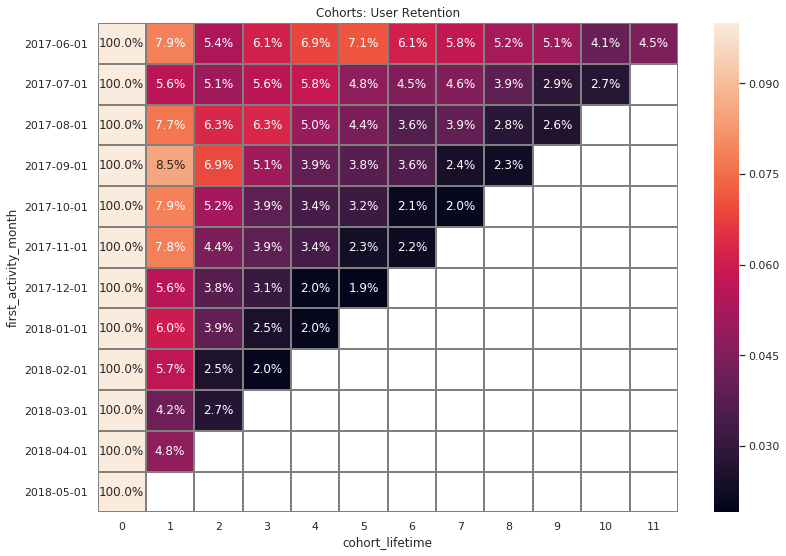

In [25]:
# Построим сводную таблицу
retention_pivot = visits_cohorts.pivot_table(
    index='first_activity_month', 
    columns='cohort_lifetime', 
    values='retention')

# Функция для отображения сводной таблицы на heatmap
def draw_heatmap(pivot_table, heatmap_title, format='.1f', value_max=None):
    sns.set(style='white')
    fig, ax = plt.subplots(figsize = (13, 9))
    y_axis_labels = pivot_table.index.strftime('%Y-%m-%d')
    ax = sns.heatmap(
        pivot_table, 
        annot=True, 
        fmt=format, 
        linewidths=1, 
        linecolor='gray', 
        vmax=value_max, 
        yticklabels=y_axis_labels)
    plt.yticks(rotation = 0)
    plt.title(heatmap_title)

# Отобразим retention rate на heatmap
draw_heatmap(pivot_table=retention_pivot, heatmap_title='Cohorts: User Retention', format='.1%', value_max=0.1)


In [26]:
# Посчитаем средний retention rate за первый месяц после образованиея когорты.
retention_rate_mean = retention_pivot[1].mean()

print('Среднее значение retention_rate за первый месяц после образованиея когорты составляент {:.1%}'.format(retention_rate_mean))

Среднее значение retention_rate за первый месяц после образованиея когорты составляент 6.5%


### Вывод

Среднее значение Retention Rate в первый месяц после образованиея когорты составляент 6.5%. При этом, наибольший Retention Rate (около 8%) наблюдается у когорт, которые сформировались с июня по ноябрь. Исключение составляет июльская когорта, Retention Rate мервого месяца в которой составил 5.6%.  
Начиная с декабря 2017, Retention Rate мервого месяца снижается и составляет около 5%.  
С увеличение lifetime когорты Retention Rate падает. Причем это падение гораздо более выражено в кагортах, сформированных ближе к концу исследуемого периода (начиная с ноября 2017).

### Когда люди начинают покупать

In [27]:
# По каждому пользователю выделим дату совершения первой покупки
first_order_ts = orders_df.groupby(['uid'])['buy_ts'].min()
first_order_ts.name = 'first_order_ts'

# Создадим датафрейм, который будет содержать дату первого визита, дату первой покупки
# и время, прошедшее с первого визита до первой покупки
time_to_first_order_df = pd.DataFrame()
time_to_first_order_df['first_activity_ts'] = first_activity_ts
time_to_first_order_df = time_to_first_order_df.join(first_order_ts, on='uid')

# Удалим информацию о юзерах, которые еще не совершили ни одной покупки
time_to_first_order_df = time_to_first_order_df.dropna()

# Посчитаем сколько времени прошло с первого визита до первой покупки
time_to_first_order_df['time_to_first_order'] = \
time_to_first_order_df['first_order_ts'] - time_to_first_order_df['first_activity_ts']

display(time_to_first_order_df.head())

# Оценим, как распределено время с первого визита до первой покупки
display(time_to_first_order_df['time_to_first_order'].describe())

,first_activity_ts,first_order_ts,time_to_first_order
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


count                      36522
mean     16 days 21:40:50.532281
std      47 days 01:45:34.984683
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:30
max            363 days 07:04:00
Name: time_to_first_order, dtype: object

Как видно из показателей, полученных методом describe, time_to_first_order распределено неравномерно и содержит выбросы. В связи с этим, для оценки среднего значения будет применена медиана

In [28]:
# Рассчитаем медиану
time_to_first_order_median = time_to_first_order_df['time_to_first_order'].median()

print('В среднем с момента первого визита на сайт до момента первой покупки проходит {}'.format(time_to_first_order_median))


В среднем с момента первого визита на сайт до момента первой покупки проходит 0 days 00:16:00


### Вывод

В среднем от начала первой сессии пользователя до его первой покупки проходит около 16 минут. То есть большинство пользователей, совершивших покупку на Яндекс.Афише, сделали это уже во время первой сессии. 

### Сколько раз покупают за период

В качестве периода, за который будет проводиться рассчет, возьмем месяц.  
Сформируем когорты по месяцу первой покупки, добавим показатель lifetime когорты.

In [29]:
# Добавим в order_df информацию о месяце совершения заказа
orders_df['order_month'] = orders_df['buy_ts'].astype('datetime64[M]')

# Добавим в order_df информацию о дате и времени первой покупки для каждого покупателя
orders_df = orders_df.join(first_order_ts, on='uid')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Добавим в order_df информацию о месяце первой покупки
orders_df['first_order_month'] = orders_df['first_order_ts'].astype('datetime64[M]')

# Посчитаем время жизни кагорты в месяцах
orders_df['cohort_lifetime'] = (orders_df['order_month'] - orders_df['first_order_month'])
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'] / np.timedelta64(1,'M')
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'].round().astype(int)
display(orders_df.head())

,buy_ts,revenue,uid,order_month,first_order_ts,first_order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,0


In [31]:
# Создадим функцию для формирования когорт покупателей
def make_cohort(df):
    # Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.
    orders_cohorts = df.groupby(['first_order_month','cohort_lifetime']).agg(
        n_buyers = pd.NamedAgg(column='uid', aggfunc='nunique'), 
        n_orders = pd.NamedAgg(column='uid', aggfunc='count'), 
        revenue = pd.NamedAgg(column='revenue', aggfunc='sum')
    ).reset_index()
    
    # Найдём исходное количество покупателей в когорте и назовем его cohort_buyers
    initial_buyers_count = orders_cohorts[orders_cohorts['cohort_lifetime'] == 0]\
    [['first_order_month','n_buyers']]
    initial_buyers_count = initial_buyers_count.rename(columns={'n_buyers':'cohort_buyers'})

    # Объединим данные по когортам с исходным количеством пользователей в когорте
    orders_cohorts = orders_cohorts.merge(initial_buyers_count,on='first_order_month')
    
    return orders_cohorts

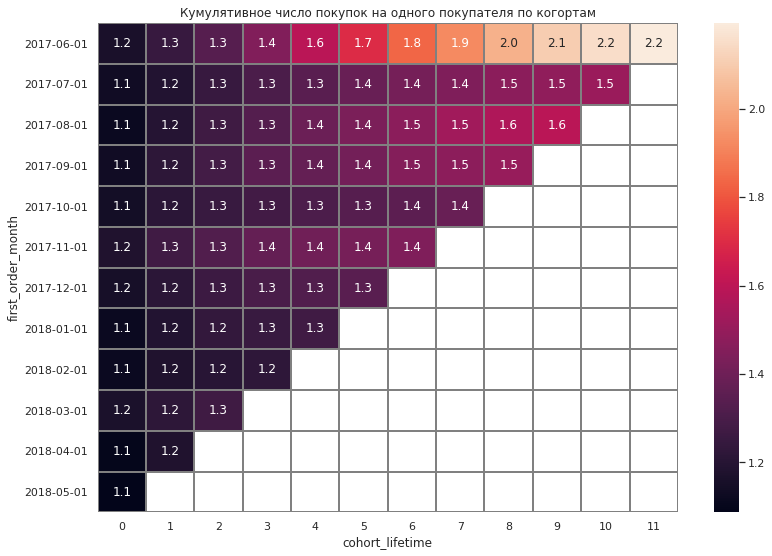

In [32]:
# Сгруппируем данные по когорте и lifetime. 
# Посчитаем для каждой когорты количество покупателей и количество покупок
orders_cohorts = make_cohort(orders_df)

# Рассчитаем соотношение количества покупок к количеству покупателей в кагорте
orders_cohorts['orders_per_buyer'] = \
orders_cohorts['n_orders'] / orders_cohorts['cohort_buyers']

# Построим сводную таблицу
orders_per_buyer_pivot = orders_cohorts.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='orders_per_buyer').cumsum(axis=1)

# Отобразим кумулятивное число покупок на одного покупателя по когортам на heatmap
draw_heatmap(pivot_table=orders_per_buyer_pivot, 
             heatmap_title='Кумулятивное число покупок на одного покупателя по когортам')


In [33]:
# Посчитаем средние значения
print('В первый месяц каждый покупатель в среднем совершает {:.1f} покупки'\
      .format(orders_per_buyer_pivot[0].mean()))
print('В течении первых 3 месяцев каждый покупатель в среднем совершает {:.1f} покупки'\
      .format(orders_per_buyer_pivot[2].mean()))
print('В течении первых 6 месяцев каждый покупатель в среднем совершает {:.1f} покупки'\
      .format(orders_per_buyer_pivot[5].mean()))
print('В течении первых 9 месяцев каждый покупатель в среднем совершает {:.1f} покупки'\
      .format(orders_per_buyer_pivot[8].mean()))

В первый месяц каждый покупатель в среднем совершает 1.1 покупки
В течении первых 3 месяцев каждый покупатель в среднем совершает 1.3 покупки
В течении первых 6 месяцев каждый покупатель в среднем совершает 1.4 покупки
В течении первых 9 месяцев каждый покупатель в среднем совершает 1.6 покупки


### Вывод

Каждый покупатель в течении первого месяца совершает в среднем 1.1 покупки, за первые 6 месяцев - 1.4 покупки, а за певые 9 месяцев - 1.6 покупки. Данный показатель количества покупок на одного покупателя характерен для всех когорт, кроме первой (июнь 2017). В этой когорте показатели были выше. Так за первые 6 месяцев покупатели, относящиеся к данной когорте, совершали в среднем 1.7 покупок, а за первые 9 месяцев - 2 покупки.

### Какой средний чек

Поскольку в описании задания не указана размерность revenue, будем обозначать ее как у.е. (условные единицы).

In [34]:
# Посчитаем среднее значение чека за весь период
mean_bill = orders_df['revenue'].mean()
print('Средний чека за весь период составляет {:.2f} у.е.'.format(mean_bill))

Средний чека за весь период составляет 5.00 у.е.


In [35]:
# Добавим в order_df информацию о дате совершения заказа
orders_df['order_date'] = orders_df['buy_ts'].astype('datetime64[D]')

# Сгруппируем заказы по дате и посчитаем средний чек
mean_bill_per_date = orders_df.groupby(['order_date']).agg(
    mean_bill = pd.NamedAgg(column = 'revenue', aggfunc='mean')
).reset_index()

# Сгруппируем заказы по месяцу и посчитаем средний чек
mean_bill_per_month = orders_df.groupby(['order_month']).agg(
    mean_bill = pd.NamedAgg(column = 'revenue', aggfunc='mean')
).reset_index()

# Посчитаем минимальное и максимальное значение среднего чека по месяцам
print('Среднее значение чека по месяцам колеблется от {:.2f} до {:.2f} у.е.'\
      .format(mean_bill_per_month['mean_bill'].min(), \
      mean_bill_per_month['mean_bill'].max()))

Среднее значение чека по месяцам колеблется от 4.06 до 5.85 у.е.


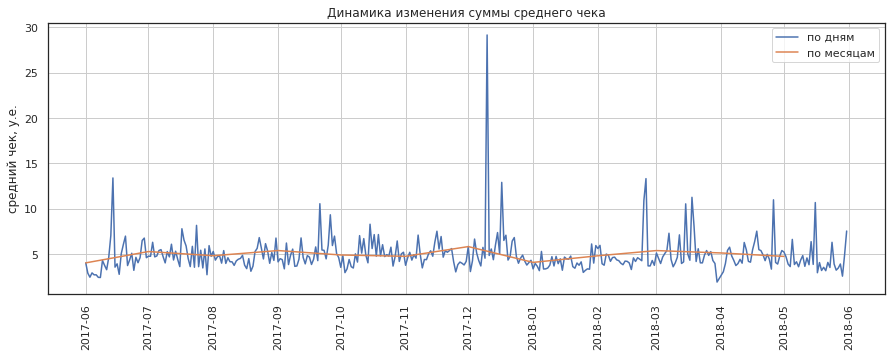

In [36]:
# Отобразим измененние среднего чека в течениии года
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot('order_date', 'mean_bill', data=mean_bill_per_date)
ax.plot('order_month', 'mean_bill', data=mean_bill_per_month)
plt.legend(['по дням', 'по месяцам'])
# Зададим формат для xticks в виде год-месяц
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Динамика изменения суммы среднего чека')
plt.ylabel('средний чек, у.е.')

plt.grid()
plt.show()


Как видно и графика, измненения среднего чека по месяцам были небольшими. В то же время, средний чек по дням содержит ярко выраженные пики. Узнаем, в какие дни средний чек был максимальным. 

In [37]:
display(mean_bill_per_date.sort_values(by='mean_bill', ascending = False).head())

,order_date,mean_bill
192,2017-12-10,29.133313
13,2017-06-14,13.403396
268,2018-02-24,13.328986
199,2017-12-17,12.916950
290,2018-03-18,11.273562


In [38]:
# Посмотрим, какие покупки были совершены 2017-12-10, чтобы понять, как получился такой аномально большой средний чек
display(orders_df[orders_df['order_date'] == '2017-12-10'].sort_values(by='revenue', ascending = False).head(10))


,buy_ts,revenue,uid,order_month,first_order_ts,first_order_month,cohort_lifetime,order_date
23244,2017-12-10 20:17:00,2633.28,5539673724080479777,2017-12-01,2017-09-20 19:55:00,2017-09-01,3,2017-12-10
23165,2017-12-10 13:04:00,1195.64,5539673724080479777,2017-12-01,2017-09-20 19:55:00,2017-09-01,3,2017-12-10
23196,2017-12-10 15:58:00,243.83,5539673724080479777,2017-12-01,2017-09-20 19:55:00,2017-09-01,3,2017-12-10
23205,2017-12-10 16:27:00,36.67,2858844541699580113,2017-12-01,2017-12-10 14:33:00,2017-12-01,0,2017-12-10
23136,2017-12-10 06:13:00,34.83,970975784987511180,2017-12-01,2017-11-04 14:03:00,2017-11-01,1,2017-12-10
23225,2017-12-10 18:39:00,20.17,970975784987511180,2017-12-01,2017-11-04 14:03:00,2017-11-01,1,2017-12-10
23190,2017-12-10 15:20:00,17.78,1200146875600316248,2017-12-01,2017-12-10 15:20:00,2017-12-01,0,2017-12-10
23231,2017-12-10 19:13:00,12.22,16133872958172068916,2017-12-01,2017-12-10 19:13:00,2017-12-01,0,2017-12-10
23145,2017-12-10 10:34:00,10.51,11920452646463905188,2017-12-01,2017-06-03 11:27:00,2017-06-01,6,2017-12-10
23141,2017-12-10 09:50:00,9.90,2979688828418358701,2017-12-01,2017-12-10 09:50:00,2017-12-01,0,2017-12-10


Как видно, такой большой средний чек вызван не тем, что все покупатели покупали в этот день больше (например в связи с распродажей), а с тем, что один клиент совершил 3 очень крупных покупки.

### Вывод
Средний чек за весь исследуемый период составил 5.00 у.е.. По месяцам данный показатель колебался от 4.06 до 5.85 у.е.. Максимальный средний чек наблюдался в декабре, минимальный - в июне и январе.  
Если рассматривать величину среднего чека по дням, то видно наличие "выбросов" с аномально высоким средним чеком. Так, 12 октября 2017 года средний чек составил 29.13 у.е., что почти в 6 раз превышает среднее значение за весь исследуемый период. Как показал дальнейший анализ, такой большой средний чек вызван тем, что один клиент совершил 3 очень крупных покупки.

### Сколько денег приносят? (LTV)

#### Сформируем когорты для расчета LTV

Найдем источник первого визита для каждого посетителя

In [39]:
# Найдем источник первого визита для каждого посетителя
first_visits = visits_df.loc[visits_df['start_ts'] == visits_df['first_activity_ts']]
first_visits_source = first_visits[['uid', 'source_id']]
first_visits_source = first_visits_source.rename(columns = {'source_id': 'first_visit_source_id'})

# Добавим информацию об источнике первого визита в visits_df
visits_df = visits_df.merge(first_visits_source,on='uid')
display(visits_df.head())

# Добавим информацию об источнике первого визита в orders_df
orders_df = orders_df.merge(first_visits_source,on='uid')


,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date,session_length,first_activity_ts,first_activity_month,cohort_lifetime,first_visit_source_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-18,2017-12-20,18,2017-12-20 17:20:00,2017-12-01,0,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19,2018-02-19,28,2018-02-19 16:53:00,2018-02-01,0,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-14,2018-05-20,24,2018-03-09 20:05:00,2018-03-01,2,4
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-05,2018-03-09,28,2018-03-09 20:05:00,2018-03-01,0,4


In [40]:
# Узнаем, сколько покупателей пришли из какого источника
buyers_by_source = orders_df.groupby('first_visit_source_id')['uid'].count()
display(buyers_by_source)

first_visit_source_id
1      5223
2      6392
3     13289
4     12894
5      9406
7         1
9      1647
10     1562
Name: uid, dtype: int64

Разобьем пользователей на когорты отдельно для каждого источника и посчитаем LTV

In [41]:
# Создадим когорты покупателей вне зависимости от источника
orders_cohorts_all_sources = make_cohort(orders_df)

# Отдельно создадим когорты покупателей, пришедших из разных источников 
# кроме 7го, так как из этого источника пришел всего один пользователь
orders_cohorts_source_1 = make_cohort(orders_df.query('first_visit_source_id == 1'))
orders_cohorts_source_2 = make_cohort(orders_df.query('first_visit_source_id == 2'))
orders_cohorts_source_3 = make_cohort(orders_df.query('first_visit_source_id == 3'))
orders_cohorts_source_4 = make_cohort(orders_df.query('first_visit_source_id == 4'))
orders_cohorts_source_5 = make_cohort(orders_df.query('first_visit_source_id == 5'))
orders_cohorts_source_9 = make_cohort(orders_df.query('first_visit_source_id == 9'))
orders_cohorts_source_10 = make_cohort(orders_df.query('first_visit_source_id == 10'))

cohorts_list = [
    [orders_cohorts_all_sources, 'all'], 
    [orders_cohorts_source_1, '1'], 
    [orders_cohorts_source_2, '2'], 
    [orders_cohorts_source_3, '3'], 
    [orders_cohorts_source_4, '4'], 
    [orders_cohorts_source_5, '5'], 
    [orders_cohorts_source_9, '9'],
    [orders_cohorts_source_10, '10']
]

# Рассчитаем LTV для каждой когорты
for cohort in cohorts_list:
    cohort[0]['ltv'] = cohort[0]['revenue'] / cohort[0]['cohort_buyers']


Для когорт, содержащих всех пользователей (вне зависимости от источника) отобразим на heatmap изменение LTV с возрастанием lifetime когорты

In [42]:
# Напишем функцию для создание сводной таблицы по ltv с накоплением
def make_pivot_table(df, value_column):
    pivot = df.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values=value_column, 
        aggfunc='mean').round(2).cumsum(axis=1)
    return pivot

# Напишем функцию для расчета среднего LTV за 6 месяцев
def calculate_ltv_for_6_month(df):
    ltv_pivot = make_pivot_table(df[0], 'ltv')
    month6_ltv_mean = ltv_pivot[5].mean()
    return month6_ltv_mean

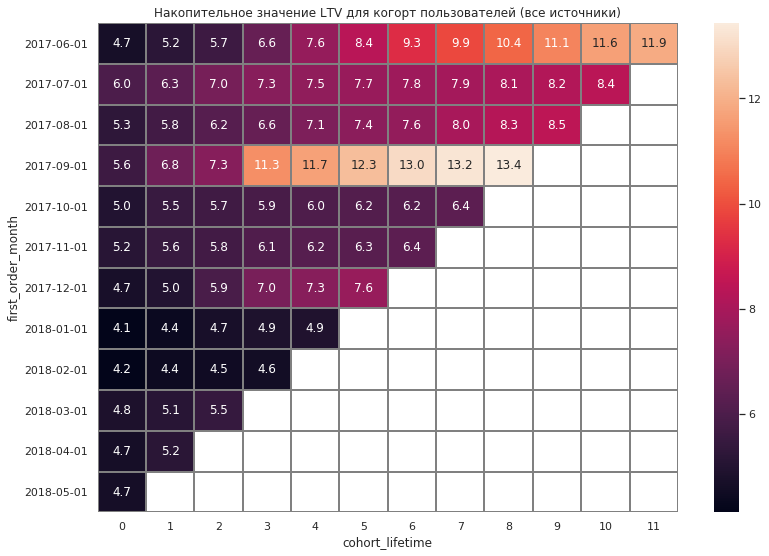

In [43]:
# Построим сводную таблицу с накоплением    
ltv_pivot = make_pivot_table(orders_cohorts_all_sources, 'ltv')

# Отобразим на heatmap LTV одного покупателя по когортам
draw_heatmap(pivot_table=ltv_pivot, 
             heatmap_title='Накопительное значение LTV для когорт пользователей (все источники)')


In [44]:
# Посчитаем средние значения LTV за 3, 6 и 9 месяцев
print('В среднем (не рассматривая источник) каждый клиент приносит:')
print('- за 3 месяца: {:.2f} у.е.'.format(ltv_pivot[2].mean()))
print('- за 6 месяцев: {:.2f} у.е.'.format(ltv_pivot[5].mean()))
print('- за 9 месяцев: {:.2f} у.е.'.format(ltv_pivot[8].mean()))


В среднем (не рассматривая источник) каждый клиент приносит:
- за 3 месяца: 5.82 у.е.
- за 6 месяцев: 7.97 у.е.
- за 9 месяцев: 10.06 у.е.


Для пользователей из каждого источника рассчитаем средний LTV за 6 месяцев.  
Период в 6 месяцев выбран по следующим причинам:  
- этот период достаточно большой, чтобы посчитать LTV;
- данного "периода жизни" достигло достаточное число когорт (7), чтобы можно было посчитать среднее значение.

In [45]:
# Рассчитаем LTV за 6 месяцев для каждого из источников
user_metrics = pd.DataFrame(columns=['source_id', 'ltv_6month'])

for cohort in cohorts_list:
    user_metrics = user_metrics.append(
        {'source_id': cohort[1], 'ltv_6month': round(calculate_ltv_for_6_month(cohort), 2)}, ignore_index=True)

display(user_metrics.sort_values(by='ltv_6month', ascending = False))

,source_id,ltv_6month
2,2,15.49
1,1,12.01
5,5,9.35
0,all,7.97
4,4,6.03
6,9,5.82
3,3,5.73
7,10,3.93


### Вывод

Среднее значение LTV покупателя (по всем источникам) составляет 5.82 у.е. за 3 месяца, 7.97 за 6 месяцев и 10.06 за 9 месяцев.  
Исключение составляет когорта сентября 2017, в которой LTV значительно превышал средние значения. Так, LTV за 6 месяцев в данной когорте превысил 13 у.е.  
Полученные средние значения LTV в целом соответствует ранее полученным данным по числу покупок на одного покупателя и велечине среднего чека. Так, за первые 6 месяцев, покупатели в среднем совершали 1.4 покупки при средней велечине чека 5.00 у.е. Таким образом, за 6 месяцев они тратили `1.4 покупки * 5.00 у.е. = 7.00 у.е`. Это значение близко к значению LTV за 6 месяцев, полученному в данном разделе исследования.  
LTV выше среднего за 6 месяцев был у пользователей, пришедших из источников с id=2 (15.49 у.е.), id=1 (12.01 у.е.), id=5 (9.35 у.е.). В дальнейшем проверим, окупил ли LTV стоимость привлечения пользователей через эти источники.


### Сколько денег потратили на маркетинг. Всего / на каждый источник / по времени

In [46]:
# Посчитаем сколько всего денег портатили на маркетинг за исследуемый период
marketing_costs_sum = costs_df['costs'].sum()
print('Всего за исследуемый период на маркетинг потратили {:n} у.е.'.format(marketing_costs_sum))
print()

# Сгруппируем затрыты на маркетинг по рекламному источнику
marketing_costs_by_source = costs_df.groupby('source_id')['costs'].sum().round().astype(int).reset_index()
print('Затраты на маркетинг по каждому рекламному источнику, по убыванию потраченной суммы:')
display(marketing_costs_by_source.sort_values(by='costs', ascending=False))

Всего за исследуемый период на маркетинг потратили 329132 у.е.

Затраты на маркетинг по каждому рекламному источнику, по убыванию потраченной суммы:


,source_id,costs
2,3,141322
3,4,61074
4,5,51757
1,2,42806
0,1,20833
6,10,5822
5,9,5517


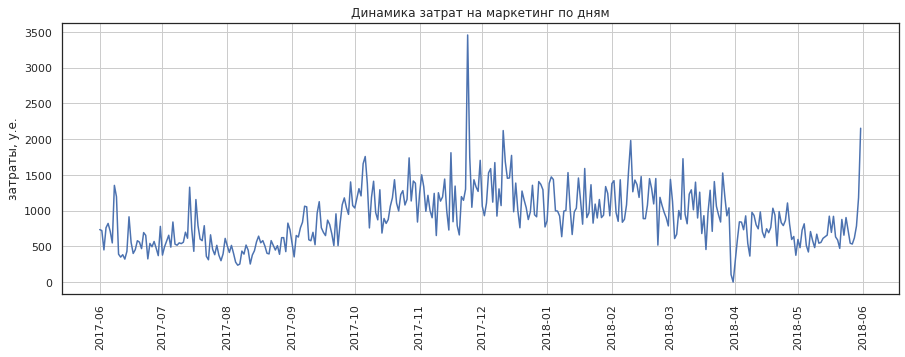

Максимальное значение суточных затрат на маркетинг составило 3458 у.е.
Максимальны затраты на маркетинг били: 2017-11-24


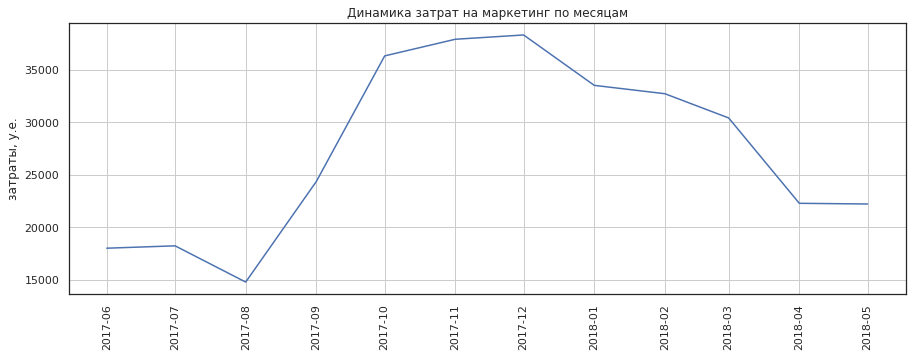

In [47]:
# Сгруппируем затраты по дате и месяцу
marketing_costs_by_dt = costs_df.groupby('dt')['costs'].sum().reset_index()
costs_df['month'] = costs_df['dt'].astype('datetime64[M]')
marketing_costs_by_month = costs_df.groupby('month')['costs'].sum().reset_index()

# Отобразим измененние затрат на маркетинг в течениии года по дням
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot('dt', 'costs', data=marketing_costs_by_dt)
# Зададим формат для xticks в виде год-месяц
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Динамика затрат на маркетинг по дням')
plt.ylabel('затраты, у.е.')

plt.grid()
plt.show()

# Посчитаем, в какой день затраты были максимальными
costs_max = marketing_costs_by_dt['costs'].max()
costs_max_date = marketing_costs_by_dt[marketing_costs_by_dt['costs'] == costs_max]['dt']
print("Максимальное значение суточных затрат на маркетинг составило {} у.е.".format(int(costs_max)))
print('Максимальны затраты на маркетинг били: ' + costs_max_date.to_string(index=False))

# Отобразим измененние затрат на маркетинг в течениии года по месяцам
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot('month', 'costs', data=marketing_costs_by_month)
# Зададим формат для xticks в виде год-месяц
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Динамика затрат на маркетинг по месяцам')
plt.ylabel('затраты, у.е.')

plt.grid()
plt.show()

In [48]:
# Посчитаем корреляыию (Коэффициент Пирсона) между затратами на маркетинг и количеством активных пользователей
print('Коэффициент корреляции между суточными затратами на маркетинг и dau составляет {:.2f}'\
              .format(marketing_costs_by_dt['costs'].corr(dau['n_uid'])))

print('Коэффициент корреляции между месячными затратами на маркетинг и mau составляет {:.2f}'\
              .format(marketing_costs_by_month['costs'].corr(mau['n_uid'])))

Коэффициент корреляции между суточными затратами на маркетинг и dau составляет 0.86
Коэффициент корреляции между месячными затратами на маркетинг и mau составляет 0.98


### Вывод

Всего за исследуемый период на маркетинг потратили 329 132 у.е. Больше всего потратили на рекламный источник с id=3 (141 322 у.е.), меньше всего - на источник с id=9 (5 517 у.е.).  
Больше всего затрат приходится на период ноября 2017 - марта 2018 (более 3 000 у.е. ежемесячно). Наибольшие суточные затраты были 2017-11-24 и составили 3 458 у.е.  
Как видно из графиков, как суточные, так и месячные маркетинговые затраты распределены так же, как и количество активных пользователей. Зависимость между этими двумя показателями подтвержает и очень высокий коэффициент корреляции. Соответственно количество привлеченных покупателей напрямую зависит от затрат на маркетинг. 

### Сколько стоило привлечение одного покупателя из каждого источника (CAC)

#### Посчитаем средние значение CAC

In [49]:
# Добавим данные о ежемесячных расходах в когорты
def add_month_costs_to_cohort(cohorts, df):
    # Посчитаем расходы за месяц
    monthly_costs = df.groupby('month')['costs'].sum().reset_index()
    # Добавим данные о расходах в когорты
    cohorts = pd.merge(cohorts, monthly_costs, left_on='first_order_month', right_on='month')
    cohorts = cohorts.drop('month', axis=1)
    return cohorts

orders_cohorts_all_sources = add_month_costs_to_cohort(orders_cohorts_all_sources, costs_df)
orders_cohorts_source_1 = add_month_costs_to_cohort(orders_cohorts_source_1, costs_df.query('source_id == 1'))
orders_cohorts_source_2 = add_month_costs_to_cohort(orders_cohorts_source_2, costs_df.query('source_id == 2'))
orders_cohorts_source_3 = add_month_costs_to_cohort(orders_cohorts_source_3, costs_df.query('source_id == 3'))
orders_cohorts_source_4 = add_month_costs_to_cohort(orders_cohorts_source_4, costs_df.query('source_id == 4'))
orders_cohorts_source_5 = add_month_costs_to_cohort(orders_cohorts_source_5, costs_df.query('source_id == 5'))
orders_cohorts_source_9 = add_month_costs_to_cohort(orders_cohorts_source_9, costs_df.query('source_id == 9'))
orders_cohorts_source_10 = add_month_costs_to_cohort(orders_cohorts_source_10, costs_df.query('source_id == 10'))

# Пересоздадим список, содержащий когорты по источникам
cohorts_list = [
    [orders_cohorts_all_sources, 'all'], 
    [orders_cohorts_source_1, '1'], 
    [orders_cohorts_source_2, '2'], 
    [orders_cohorts_source_3, '3'], 
    [orders_cohorts_source_4, '4'], 
    [orders_cohorts_source_5, '5'], 
    [orders_cohorts_source_9, '9'],
    [orders_cohorts_source_10, '10']
]


In [50]:
# Посчитаем CAC для когорт
for cohort in cohorts_list:
    cohort[0]['cac'] = cohort[0]['costs'] / cohort[0]['cohort_buyers']


In [51]:
cac_mean = pd.DataFrame(columns=['source_id', 'cac_mean'])
# Рассчитаем среднее значение CAC для каждого из источников
for cohort in cohorts_list:
    cac_mean = cac_mean.append(
        {'source_id': cohort[1], 'cac_mean': round(cohort[0]['cac'].mean(), 2)}, ignore_index=True)


In [52]:
# Добавим данные по CAC в датафрейм user_metrics
user_metrics = user_metrics.merge(cac_mean, on='source_id')

display(user_metrics.sort_values(by='cac_mean'))

,source_id,ltv_6month,cac_mean
7,10,3.93,5.04
6,9,5.82,5.06
4,4,6.03,6.98
1,1,12.01,7.15
5,5,9.35,7.17
0,all,7.97,9.32
2,2,15.49,12.64
3,3,5.73,14.06


### Вывод

Среднее значение CAC (по всем источникам) составило 9.32 у.е.  
Выше среднего стоило привлечение одного покупателя из источника c id=2 (cac составил 12.64 у.е.) и из источника с id=3 (cac составил 14.06 у.е.). Для остальных источников cac был ниже среднего и составил 7.17 у.е. и менее. В дальнейшем проверим соотношение LTV и CAC для всех источников и для каждого источника по отдельности.

### На сколько окупились расходы

In [53]:
# Рассчитаем ROMI: поделим LTV на CAC.
for cohort in cohorts_list:
    cohort[0]['romi'] = cohort[0]['ltv'] / cohort[0]['cac']


#### Посчитаем накопительный ROMI по когортам и отобразим его на heatmap

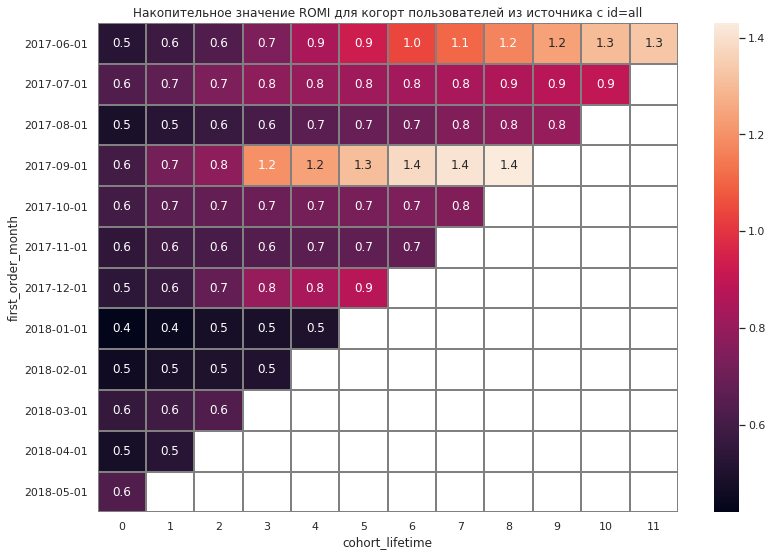

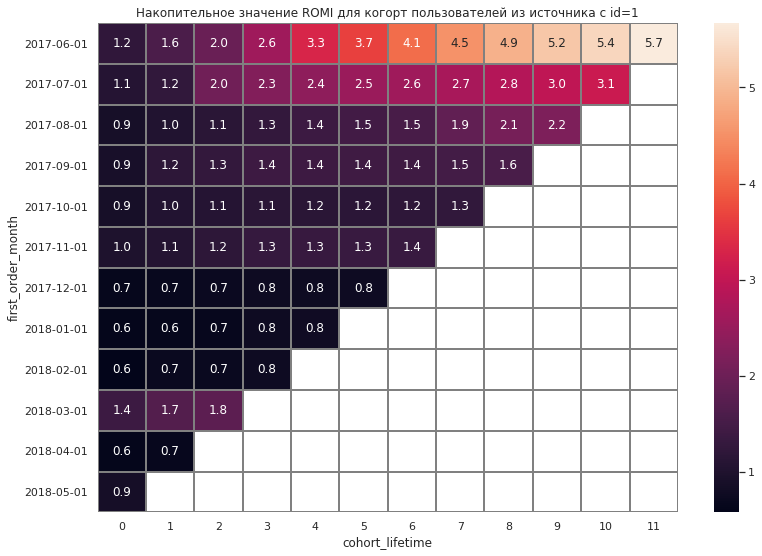

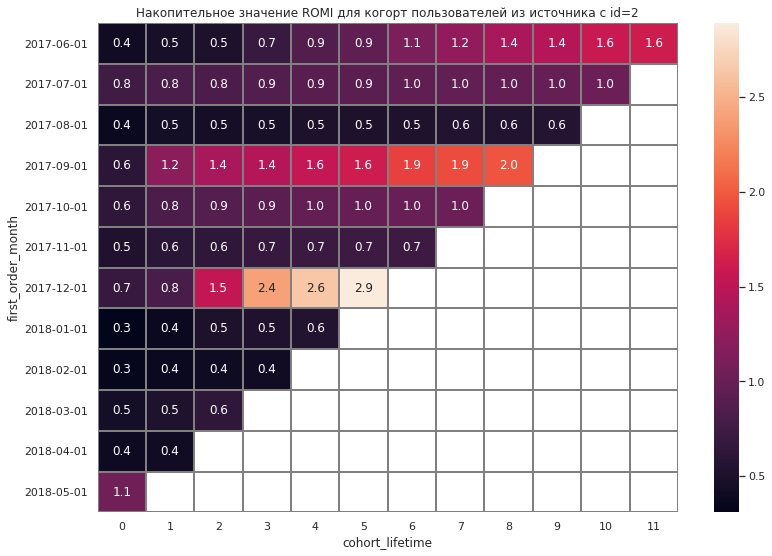

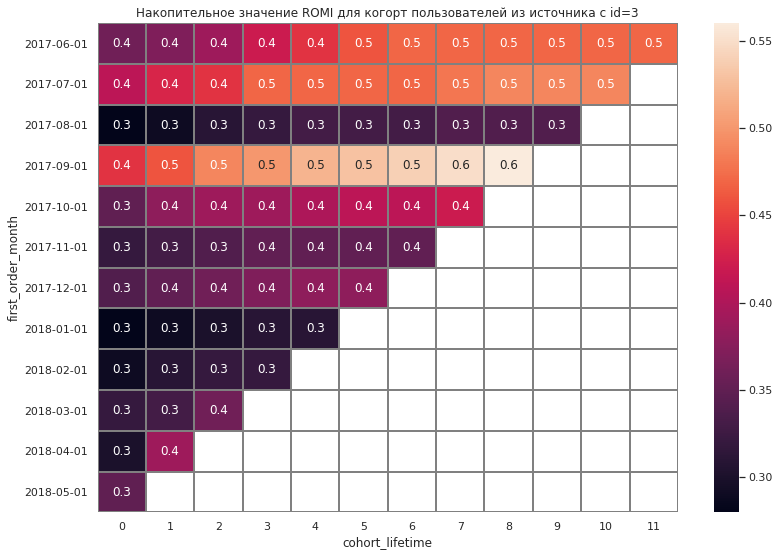

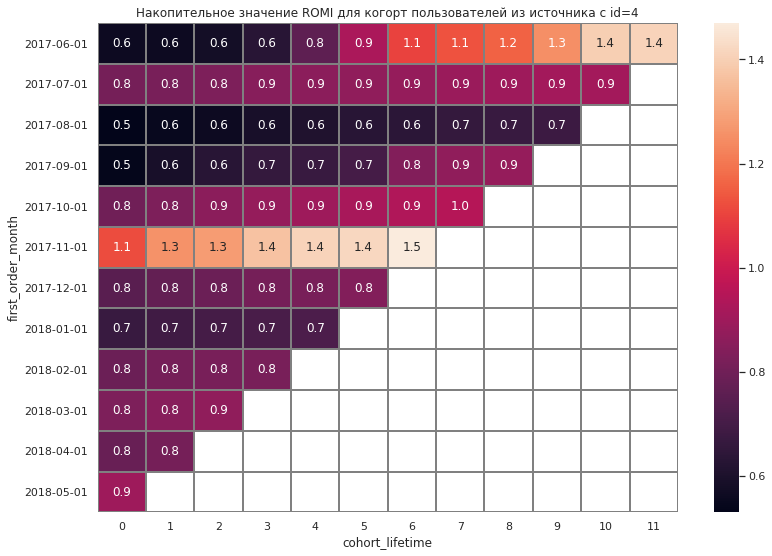

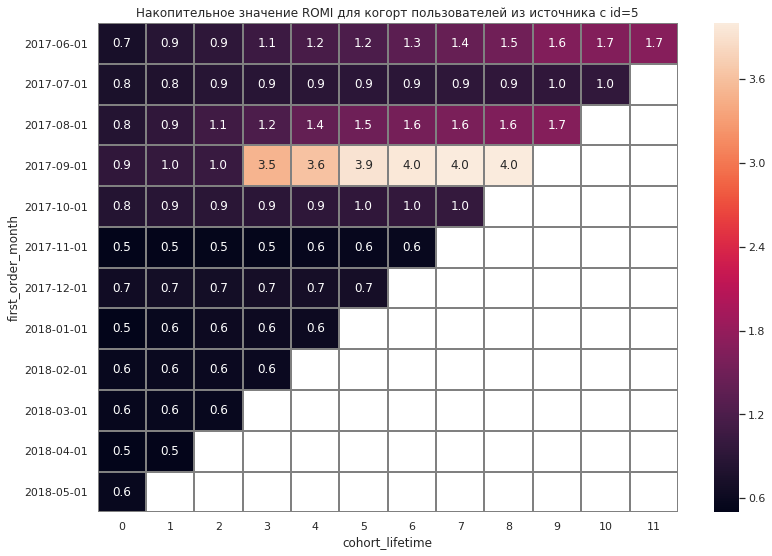

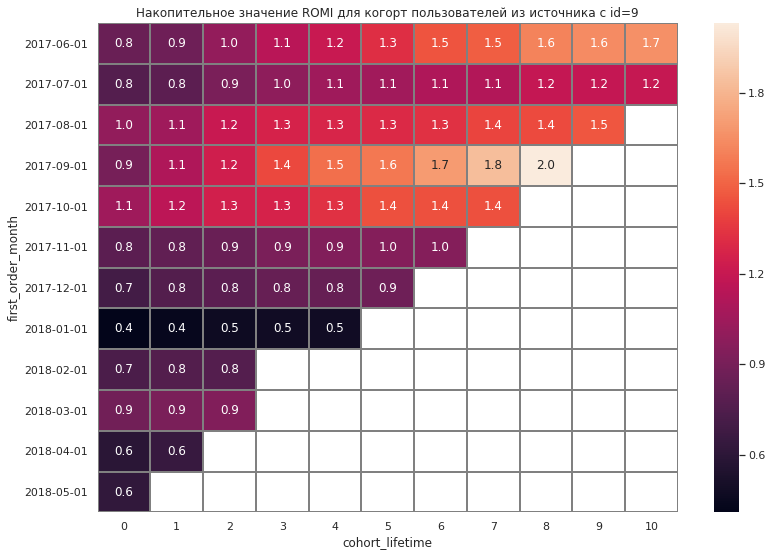

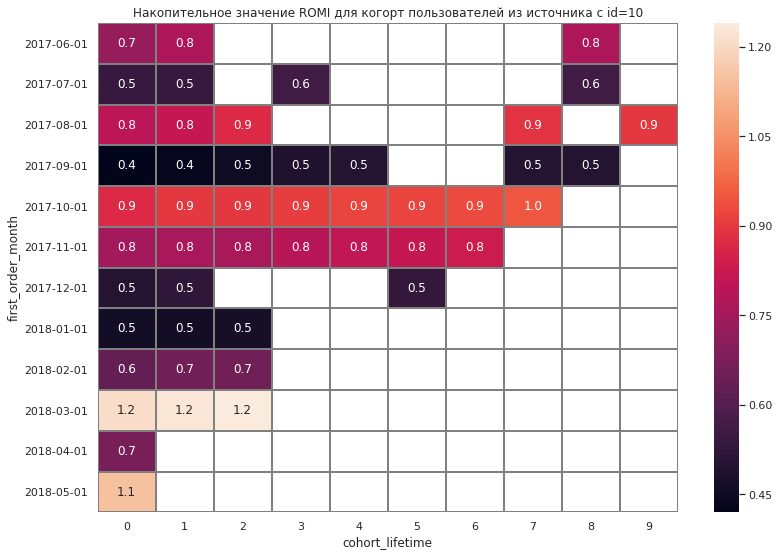

In [54]:
romi = pd.DataFrame(columns=['source_id', 'romi_3month', 'romi_6month', 'romi_9month'])
for cohort in cohorts_list:
    romi_pivot = make_pivot_table(cohort[0], 'romi')
    draw_heatmap(pivot_table=romi_pivot, 
             heatmap_title='Накопительное значение ROMI для когорт пользователей из источника с id={}'.format(cohort[1]))
    romi = romi.append(
        {'source_id': cohort[1], 
         'romi_3month': round(romi_pivot[2].mean(), 2), 
         'romi_6month': round(romi_pivot[5].mean(), 2), 
         'romi_9month': round(romi_pivot[8].mean(), 2)
        }, ignore_index=True)

In [55]:
display(romi.sort_values(by='romi_9month', ascending = False))

,source_id,romi_3month,romi_6month,romi_9month
1,1,1.26,1.76,2.86
5,5,0.78,1.39,2.02
6,9,0.94,1.22,1.56
2,2,0.78,1.23,1.22
0,all,0.63,0.86,1.06
4,4,0.79,0.90,0.90
7,10,0.76,0.76,0.61
3,3,0.37,0.42,0.47


### Вывод

В среднем, расходы, потраченные на привлечение одного покупателя, за 6 месяцев окупаются на 86%, а к 9 месяцу окупаются полностью (средний накопительный romi за 9 месяцев составил 1.06). Сильно отличается от среднего когорта сентября 2017, которая окупилась уже на 4й месяц своего существования.  
Лучше всего окупаются маркетинговые вложения в источник с id=1. ROMI по данному источнику составляет 1.26 уже на 3 месяц жизни когорты, а за 9 месяцев достигает 2.86. Учитывая, что по количеству вложенных средств, данный источник находится лишь на 5м месте (за весь период в него было вложено 20833 у.е.), видится целесообразным увеличить рассходы на привлечение покупателей из данного источника.  
Источники с id=5 и id=9 также демонстрируют значения окупаемости значительно выше средних. Затраты на них также стоит увеличить.  


## Шаг 3. Общие выводы 

По окончании исследования можно сделать следующие выводы.  
Количество привлеченных пользователей напрямую зависит от затрат на маркетинг: чем больше средств вложено в маркетинг, тем больше активных пользователй в данном периоде.  
Каждый посетитель проводит на сайте Яндекс.Афиши в среднем от 2х до 14 минут. При этом, посетители, совершившие покупки, сделали это уже в первую сессию.  
Однако Retention Rate посетителей достаточно низкий. Так, в первый месяц он составляет в среднем 6.5% и с возрастом когорты продолжает уменьшаться.  
Количество повторных покупок также невелико. В течении первых 6 месяцев каждый покупатель в среднем совершает 1.4 покупки. При этом средний чек за исследуемый период составил 5.00 у.е. Таким образом, за 6 месяцев покупатели тратили 1.4 покупки * 5.00 у.е. = 7.00 у.е.  Это значение близко к рассчитанному среднему значению LTV за 6 месяцев, которое составило 7.97 у.е.  
Среднее значение CAC (по всем источникам) составило 9.32 у.е. Соответственно, расходы на привлечение одного покупателя за 6 месяцев в среднем окупаются на 86%, а к 9 месяцу окупаются полностью. Быстрота окупаемости зависит от источника. Так, лучше всего окупаются источники с id=1, id=5 и id=9. Таким образом, видится целесообразным пересмотреть рассходы на маркетинг, значительно увеличив доли указанных источников.